# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"
sign_key_file = "human_readable_label.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(sign_key_file, mode='rb') as f:
    human_readable_label = pickle.load(f)
    
X_raw, y_raw = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_raw) == len(y_raw))
assert(len(X_test) == len(y_test))

print("Import Complete")
print("{} samples imported".format(len(X_raw) + len(X_test)))
print("Test label dict: ",human_readable_label[1])

Import Complete
51839 samples imported
Test label dict:  Speed limit (30km/h)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# Number of training examples
n_train = len(X_raw)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_raw[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_raw))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

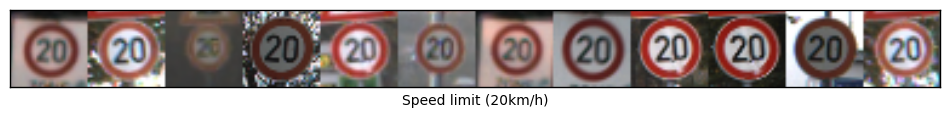

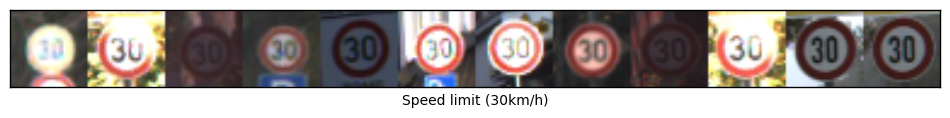

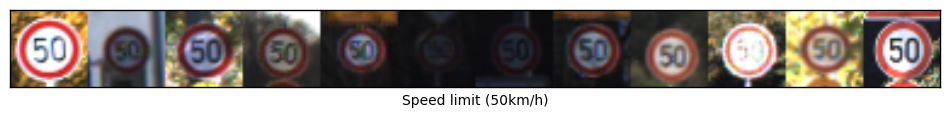

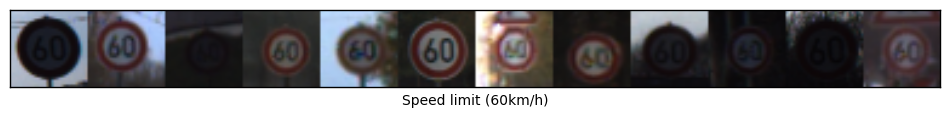

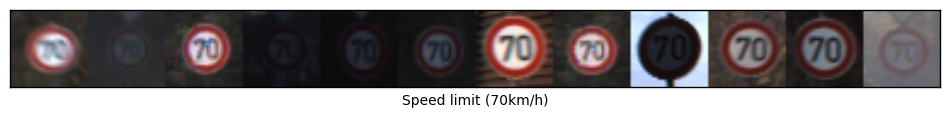

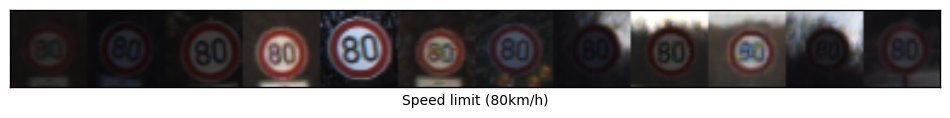

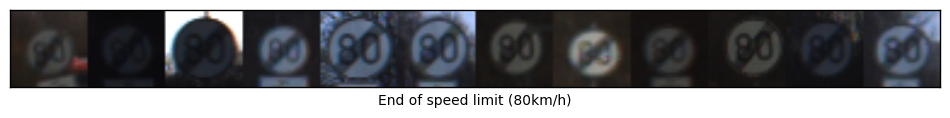

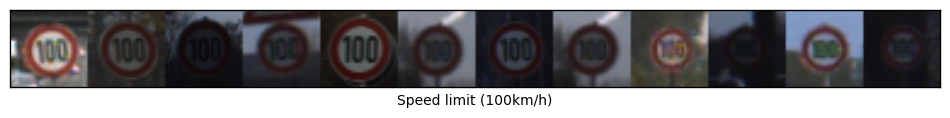

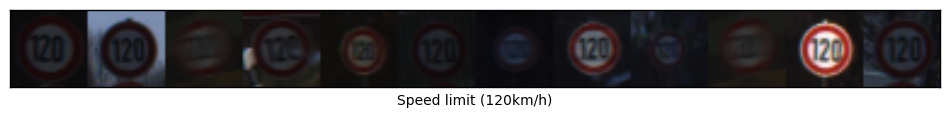

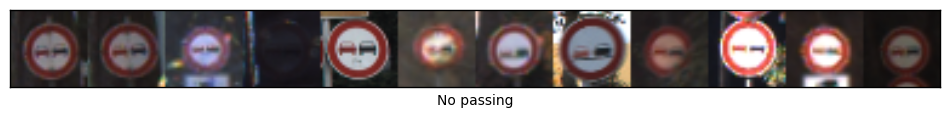

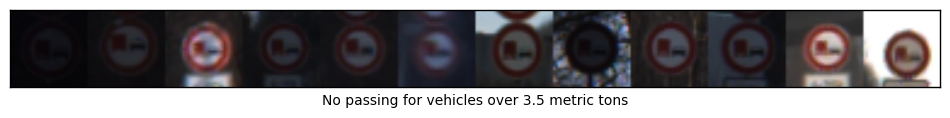

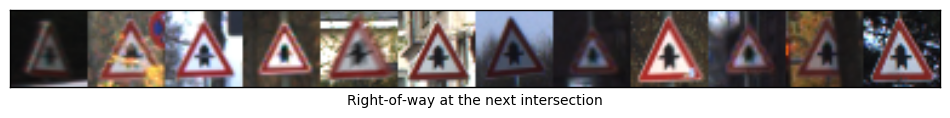

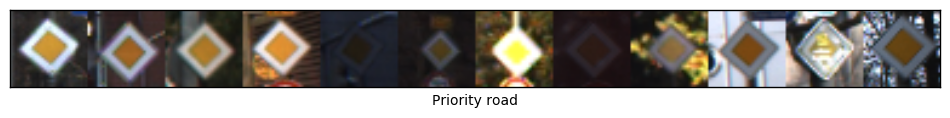

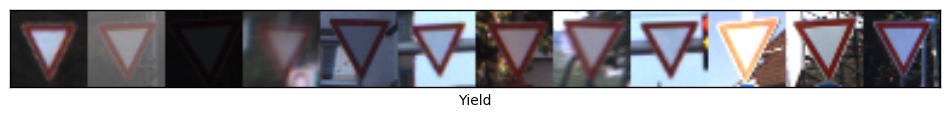

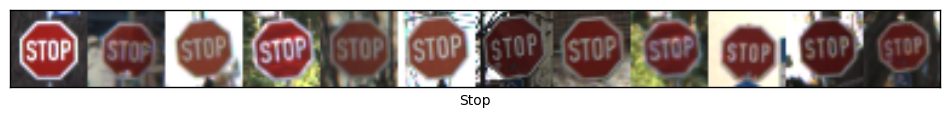

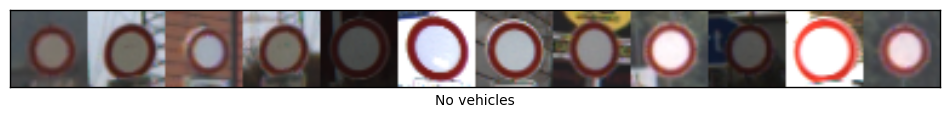

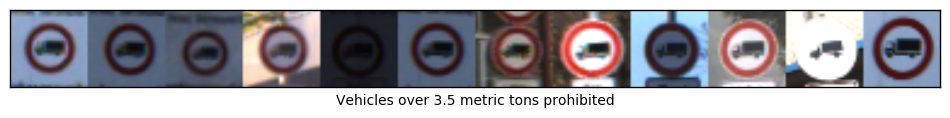

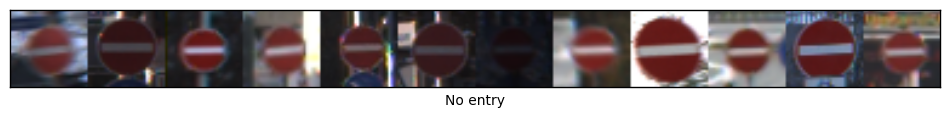

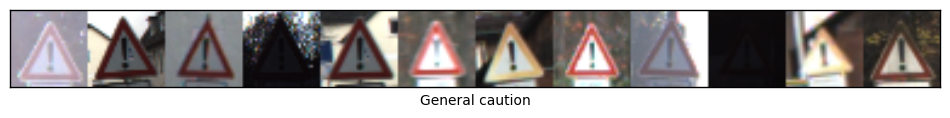

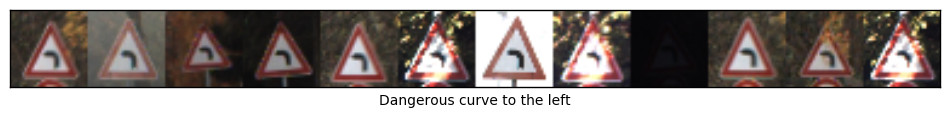

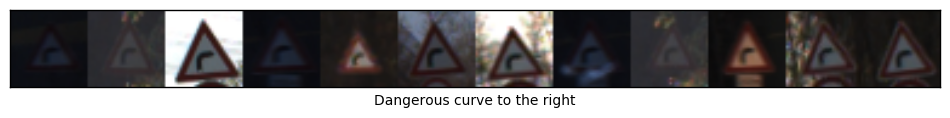

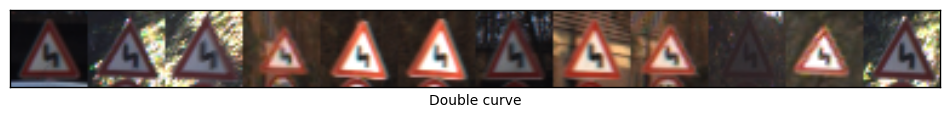

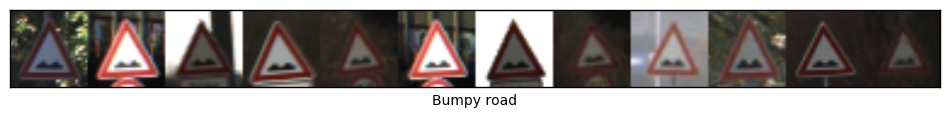

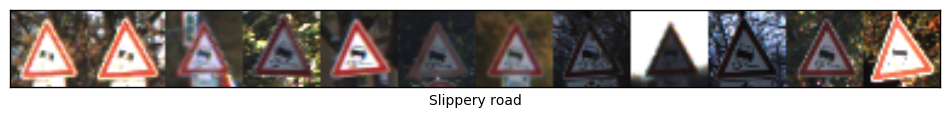

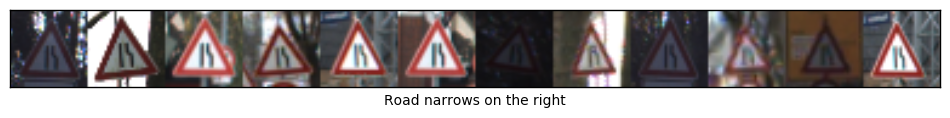

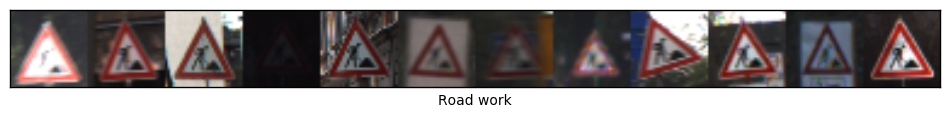

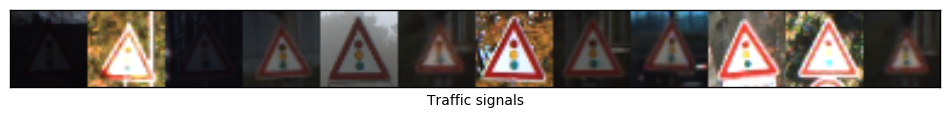

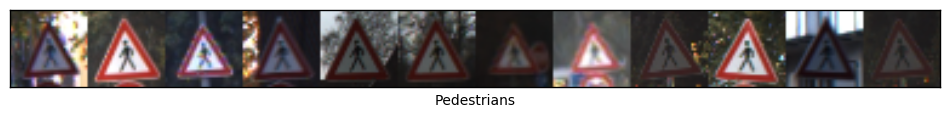

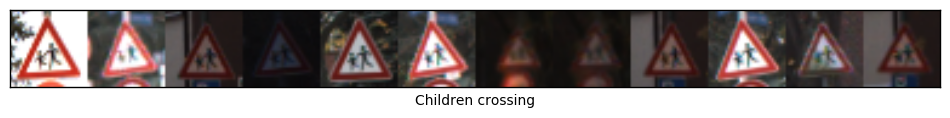

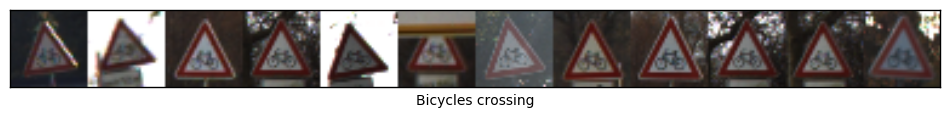

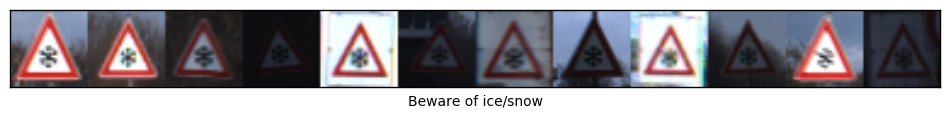

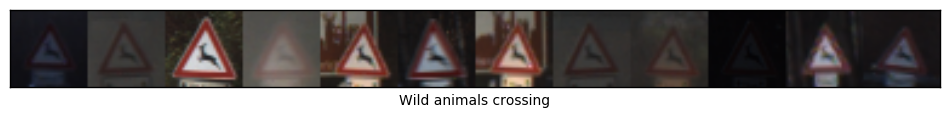

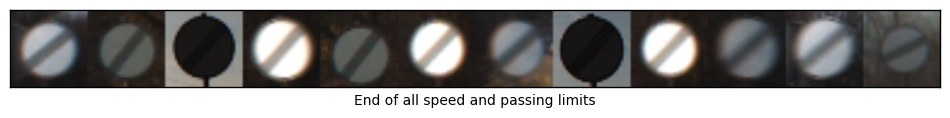

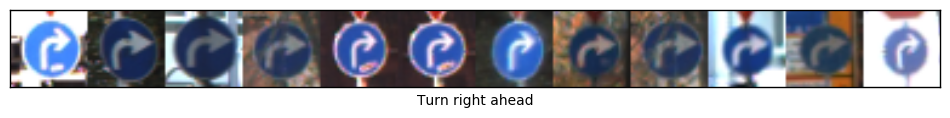

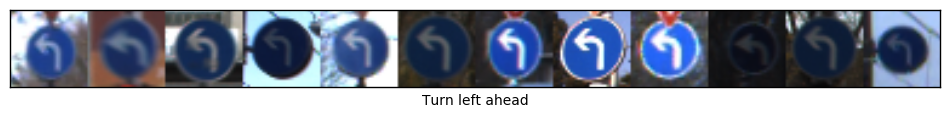

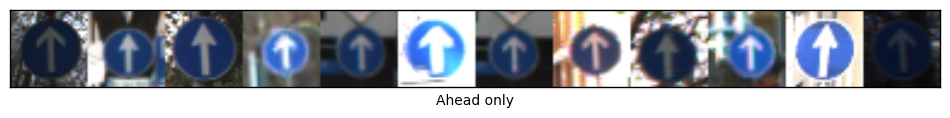

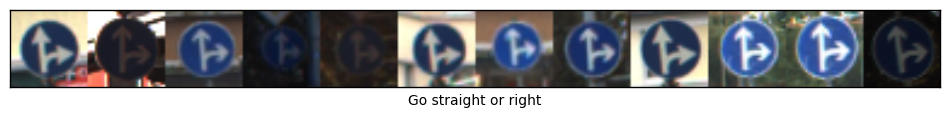

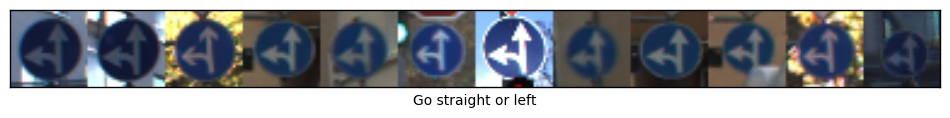

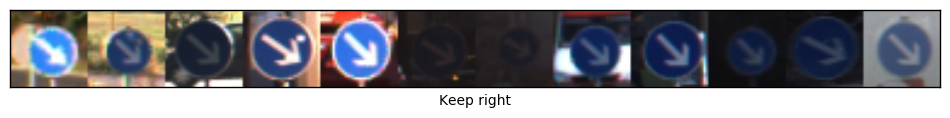

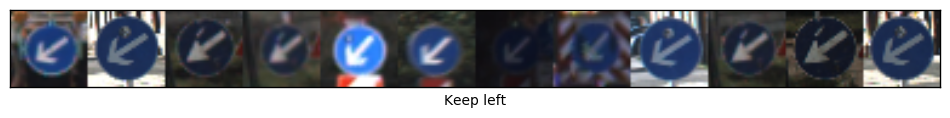

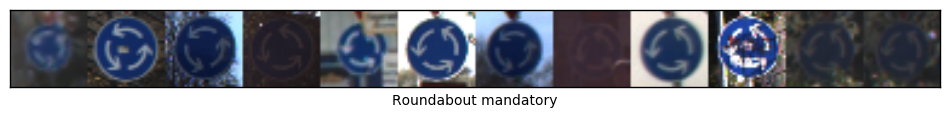

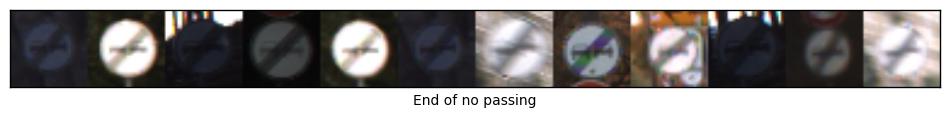

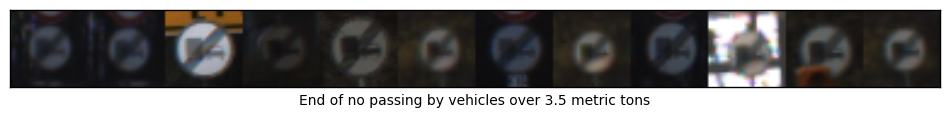

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np

# Visualizations will be shown in the notebook.
%matplotlib inline

def find_signs(sign_labels, sign_type):
    """ Find all signs of given type and return their index
    
    sign_labels -- The list of labels associated with the sign images
    sign_type -- the type of sign to return.  Numeric
    
    """
    return [i for i, j in enumerate(sign_labels) if j == sign_type]

def show_signs(signs, labels, index, title, show_index = True, show_label = True):
    """ Horizontal stack a list of signs together for review
    signs -- list, images
    labels -- list, sign labels
    index -- list, signs to print
    show_index -- bool, show the index of the first sign? default True
    show_label -- bool, show the label of the first sign? default True
    """
    img = signs[index[0]].squeeze()
    
    for i in range(1, len(index)):
        next_img = signs[index[i]]
        img = np.hstack((img, next_img))
    
    plt.figure(figsize=(12,1))
    
    if show_label:
        plt.xlabel(human_readable_label[labels[index[0]]])
    
    if show_index:
        plt.ylabel(index[0])
    
    plt.title(title)
    plt.tick_params(
        axis='both',
        which='both',
        bottom='off',
        top='off',
        left='off',
        right='off',
        labelleft='off',
        labelbottom='off')
    plt.imshow(img)
    plt.show()
#     print(index)

for sign_type in range(n_classes):
    index = random.sample(find_signs(y_raw, sign_type), 12)
    show_signs(X_raw, y_raw, index, "", False)

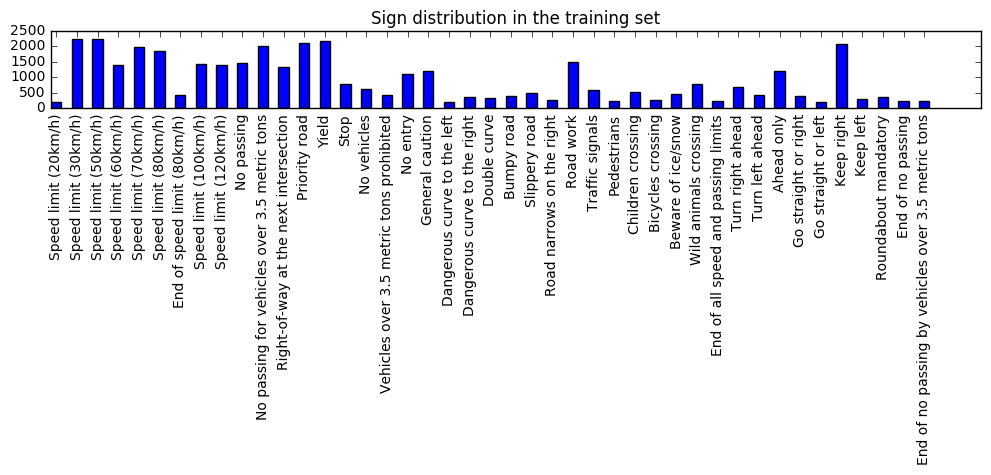

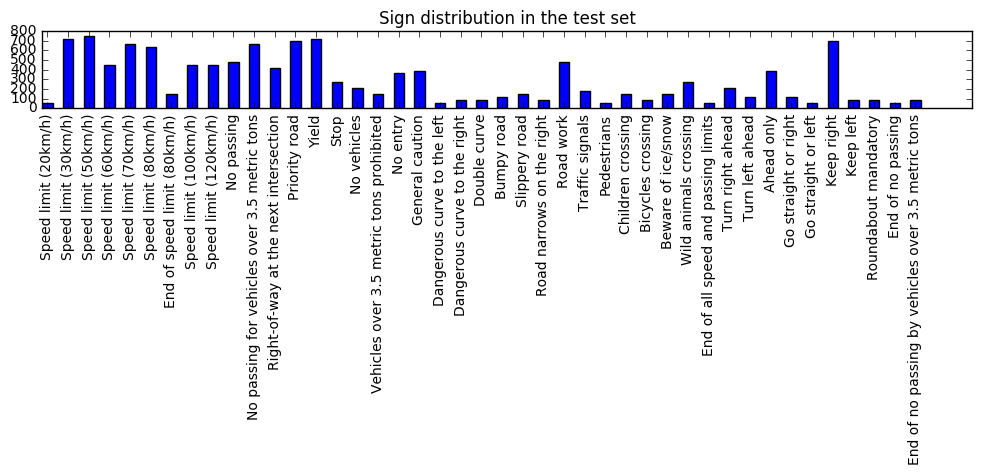

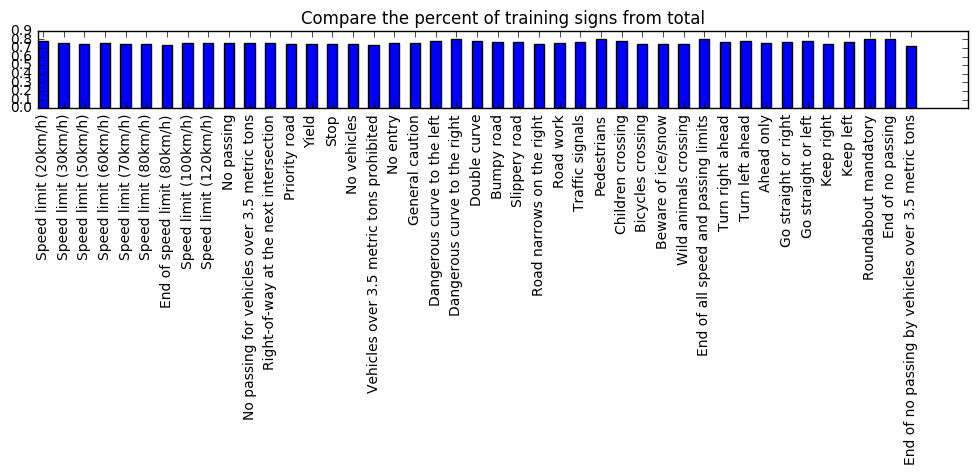

In [4]:
# Taking a look at the number of each sign type in the training set

training_sign_count = []
test_sign_count = []
for i in range(n_classes):
    training_sign_count.append(sum(y_raw == i))
    test_sign_count.append(sum(y_test == i))

# Look at the distribution of training signs
fig = plt.figure()
fig.set_size_inches(12, 1)
ax = plt.subplot(111)
width=0.5
ax.bar(range(n_classes), training_sign_count, width = width)
ax.set_xticks(np.arange(n_classes) + width/2)
ax.set_xticklabels(human_readable_label.values(), rotation=90)
plt.title("Sign distribution in the training set")
plt.show()


# Look at the distribution of test signs
fig = plt.figure()
fig.set_size_inches(12, 1)
ax = plt.subplot(111)
width=0.5
ax.bar(range(n_classes), test_sign_count, width = width)
ax.set_xticks(np.arange(n_classes) + width/2)
ax.set_xticklabels(human_readable_label.values(), rotation=90)
plt.title("Sign distribution in the test set")
plt.show()


# Look at the percentage of training vs. test
percent_training = [training/(training + test) for training, test in zip(training_sign_count, test_sign_count)]

fig = plt.figure()
fig.set_size_inches(12, 1)
ax = plt.subplot(111)
width=0.5
ax.bar(range(n_classes), percent_training, width = width)
ax.set_xticks(np.arange(n_classes) + width/2)
ax.set_xticklabels(human_readable_label.values(), rotation=90)
plt.title("Compare the percent of training signs from total")
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [33]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import cv2
import numpy as np

### Equalize the brigtness
def equalize_image(image):
    """ Histogram equalize the brightness
    Convert to YUV
    Histogram equalize the Y channel
    Convert back to RGB
    """
    # convert image to YUV
    img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    
#     equalize the histogram of the U channel
#     img_yuv[:,:,1] = cv2.equalizeHist(img_yuv[:,:,1])
    
    # equalize the histogram of the V channel
#     img_yuv[:,:,2] = cv2.equalizeHist(img_yuv[:,:,2])

    # convert the YUV image back to RGB format
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
#     return img_yuv

# Apply equalization
X_equalized = [equalize_image(image) for image in X_raw]
print("Brightness equalization complete.")

Brightness equalization complete.


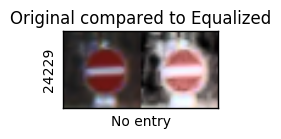

In [37]:
### Examine the equalization
index = random.randint(0, len(X_raw))
# index = 32643    # Black
index = [index, index+len(X_raw)]
show_signs(list(X_raw) + list(X_equalized), y_raw, index, "Original compared to Equalized")

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

The only preprocessing of the data I have done is to try and account for the large variation in image brightness and contrast.  Some images are so dark that I could not see the sign.  To accomplish this I converted the image to YUV colorspace then used OpenCV's Histogram Equalization on the Y channel, then reverted the image back to RGB.  This did a great job of producing images that look like they were taken at the same time.

The reason I did this equalization is that some of the images were so dark that I confused them with an empty image.  While the network should be able to classify the images in any lighting condition if I can remove that learning from the network with a simple preprocess of the data it seems like an obvious win.  I can easily apply this same equalization to any incoming image and it saves my network from having to discover the correlation between low and high contrast and brightness.

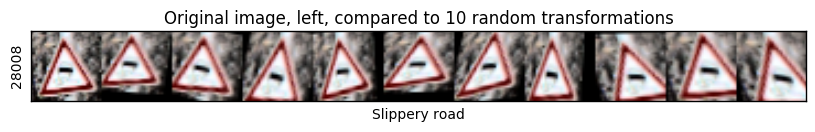

In [38]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# Function to apply some random rotations, translations and skew.
def random_transform(image, transform_limit):
    rows,cols,ch = image.shape
    
    pts1 = np.float32([[0,0], [0,cols], [rows,0]])
    
    rand_pts = [random.randrange(-transform_limit, transform_limit) for i in range(6)]
    pts2 = np.float32([
            [rand_pts[0], rand_pts[1]],
            [rand_pts[2], cols - rand_pts[3]],
            [rows - rand_pts[4], rand_pts[5]]])
    
    M = cv2.getAffineTransform(pts1,pts2)
    return cv2.warpAffine(image, M, (cols,rows))


# examine the results of the random_transform function
index = random.randint(0, len(X_equalized))
img = X_equalized[index].squeeze()
test_transformation = img
for i in range(10):
    test_transformation = np.hstack((test_transformation, random_transform(img, 6)))
plt.figure(figsize=(10,3))
plt.xlabel(human_readable_label[y_raw[index]])
plt.ylabel(index)
plt.title("Original image, left, compared to 10 random transformations")
plt.tick_params(
    axis='both',
    which='both',
    bottom='off',
    top='off',
    left='off',
    right='off',
    labelleft='off',
    labelbottom='off')
plt.imshow(test_transformation)
plt.show()

In [81]:
### Augment the training data using random transform

# Number of transformed versions to make of the data set
augment_count = 0

X_augmented = list(X_equalized)
y_augmented = list(y_raw)
# print(type(X))

print("Original data size =", len(X_equalized), len(y_raw))

for i in range(augment_count):
    # generate batch of new images
    X_batch = [random_transform(img, 8) for img in X_equalized]
    y_batch = list(y_raw)
    X_augmented += X_batch
    y_augmented += y_batch
    
# print("Original data size =", len(X), len(y))
print("Augmented data size =", len(X_augmented), len(y_augmented))
# print(type(X_augmented))

Original data size = 39209 39209
Augmented data size = 39209 39209


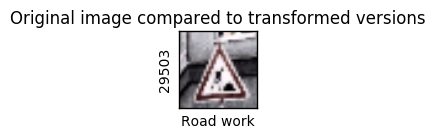

In [82]:
### examine the results of the random_transform function
index = [random.randint(0, len(X_equalized))]
index += [index[0] + (1+i)*len(X_equalized) for i in range(augment_count)]
show_signs(X_augmented, y_raw, index, "Original image compared to transformed versions")

In [83]:
### Shuffle the augmented data set and split into training and validation sets

from sklearn.model_selection import train_test_split

# shuffle data
X_shuffled, y_shuffled = shuffle(X_augmented, y_augmented)

# Ratio of the data to split for validation set
validation_ratio = 0.2

# Split the training set into a train and validation set.
X_train, X_validation, y_train, y_validation = train_test_split(
    X_shuffled, 
    y_shuffled, 
    test_size = validation_ratio, 
    random_state=121
)

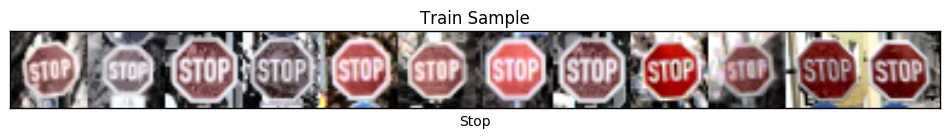

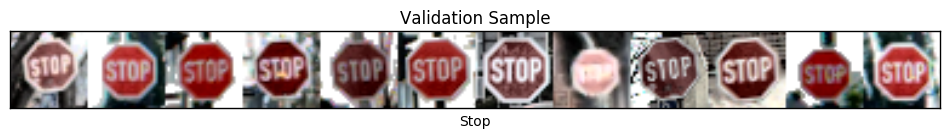

Training Set Size: 31367
Validation Set Size: 7842


In [130]:
### Examine the set split.  Check the lables match the image.

random_sign_type = random.randint(0, n_classes-1)
index = random.sample(find_signs(y_train, random_sign_type), 12)
show_signs(X_train, y_train, index, "Train Sample", False)

index = random.sample(find_signs(y_validation, random_sign_type), 12)
show_signs(X_validation, y_validation, index, "Validation Sample", False)

print("Training Set Size:", len(X_train))
print("Validation Set Size:", len(X_validation))

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [113]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
import tensorflow as tf

# Weight variable constructor
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

# Bias variable constructor
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# Convolutional Layer with ReLU activation
def conv2d_layer(features, weights, bias):
    x = tf.nn.conv2d(features, weights, strides=[1, 1, 1, 1], padding='VALID')
    x = tf.nn.bias_add(x, bias)
    return tf.nn.relu(x)

def color_map_layer(features, weights, bias):
    x = tf.nn.conv2d(features, weights, strides=[1, 1, 1, 1], padding='VALID')
    x = tf.nn.bias_add(x, bias)
    return tf.nn.tanh(x)

# 2x2 Max pool
def max_pool_2x2(features):
    return tf.nn.max_pool(features, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='VALID')

# Fully connected layer with ReLU activation and dropout
def fully_connected(features, weights, bias, dropout):
    x = tf.matmul(features, weights)
    x = tf.add(x, bias)
    x = tf.nn.relu(x)
    return tf.nn.dropout(x, dropout)

def LeNet(image, dropout):       
    weights = {
        'color_map': weight_variable([1, 1, 3, 3]),
        'conv_1': weight_variable([5, 5, 3, 16]),
        'conv_2': weight_variable([5, 5, 16, 32]),
        'fc_1': weight_variable([800, 600]),
        'fc_2': weight_variable([600, 120]),
        'fc_3': weight_variable([120, n_classes])
    }
    
    # apply small positive shift to try and avoid dead ReLUs
    biases = {
        'color_map': bias_variable([3]),
        'conv_1': bias_variable([16]),
        'conv_2': bias_variable([32]),
        'fc_1': bias_variable([600]),
        'fc_2': bias_variable([120]),
        'fc_3': bias_variable([n_classes])
    }
    
    # start the network flow with the input image
    flow = image
    
    # 1, Color Map: Convolutional. Filter = 1x1x3. Input = 32x32x3. Output = 32x32x3.
    flow = color_map_layer(flow, weights['color_map'], biases['color_map'])
    
    # 2, Conv 1: Convolutional. Filter = 5x5x16. Input = 32x32x3. Output = 28x28x16.
    flow = conv2d_layer(flow, weights['conv_1'], biases['conv_1'])
                                
    # Pooling. Input = 28x28x16. Output = 14x14x16.
    flow = max_pool_2x2(flow)
    
    # 3, Conv 2: Convolutional. Filter = 5x5x50. Input = 14x14x16. Output = 10x10x50.
    flow = conv2d_layer(flow, weights['conv_2'], biases['conv_2'])

    # Pooling. Input = 10x10x64. Output = 5x5x50.
    flow = max_pool_2x2(flow)
    
    # Flatten. Input = 5x5x50. Output = 1250.
    flow = tf.contrib.layers.flatten(flow)
    
    # 4, FC 1 3: Fully Connected. Input = 1250. Output = 600.
    flow = fully_connected(flow, weights['fc_1'], biases['fc_1'], dropout)

    # 5, Layer 4: Fully Connected. Input = 600. Output = 120.
    flow = fully_connected(flow, weights['fc_2'], biases['fc_2'], dropout)

    # 6, Layer 5: Fully Connected. Input = 120. Output = n_classes = 43.
    return tf.add(tf.matmul(flow, weights['fc_3']), biases['fc_3'])

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

#### Features and Labels

In [114]:
### Train your model here.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

#### Hyper perameters

In [124]:
RATE = 0.0005
EPOCHS = 200
BATCH_SIZE = 128
TRAINING_DROPOUT = 0.8

#### Training Pipeline

In [125]:
logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = RATE)
training_operation = optimizer.minimize(loss_operation)

#### Setup Evaluation Pipeline

In [126]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset: offset + BATCH_SIZE], y_data[offset: offset + BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Train!

In [127]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    accuracy_history = []
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            batch_x = [random_transform(img, 8) for img in batch_x]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: TRAINING_DROPOUT})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        accuracy_history.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    saver.save(sess, "tmp/model.ckpt")
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.351

EPOCH 2 ...
Validation Accuracy = 0.463

EPOCH 3 ...
Validation Accuracy = 0.521

EPOCH 4 ...
Validation Accuracy = 0.546

EPOCH 5 ...
Validation Accuracy = 0.562

EPOCH 6 ...
Validation Accuracy = 0.589

EPOCH 7 ...
Validation Accuracy = 0.613

EPOCH 8 ...
Validation Accuracy = 0.633

EPOCH 9 ...
Validation Accuracy = 0.638

EPOCH 10 ...
Validation Accuracy = 0.645

EPOCH 11 ...
Validation Accuracy = 0.665

EPOCH 12 ...
Validation Accuracy = 0.662

EPOCH 13 ...
Validation Accuracy = 0.682

EPOCH 14 ...
Validation Accuracy = 0.691

EPOCH 15 ...
Validation Accuracy = 0.702

EPOCH 16 ...
Validation Accuracy = 0.712

EPOCH 17 ...
Validation Accuracy = 0.732

EPOCH 18 ...
Validation Accuracy = 0.738

EPOCH 19 ...
Validation Accuracy = 0.744

EPOCH 20 ...
Validation Accuracy = 0.756

EPOCH 21 ...
Validation Accuracy = 0.750

EPOCH 22 ...
Validation Accuracy = 0.772

EPOCH 23 ...
Validation Accuracy = 0.776

EPOCH 24 ...
Validation Accura

Previous Best = 0.997


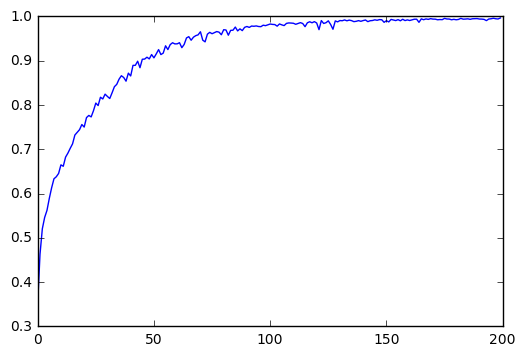

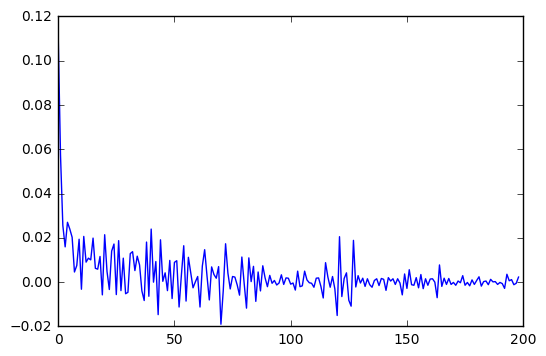

In [128]:
print("Previous Best = {:.3f}".format(accuracy_history[-1]))
dvde = [accuracy_history[i+1] - accuracy_history[i] for i in range(len(accuracy_history) - 1)]
plt.plot(accuracy_history)
plt.show()
plt.plot(dvde)
plt.show()

In [132]:
### Take a look at the accuracy of the network on the original data
with tf.Session() as sess:
    saver.restore(sess, "tmp/model.ckpt")

    test_accuracy = evaluate(X_equalized, y_raw)
    print("Accuracy on equalized train images = {:.3f}".format(test_accuracy))

Accuracy on equalized train images = 0.997


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
Training the model was a significant amount of finagaling.  I feel I was lucky to have the initial model work to a fair degree to start with.

I spent most of my time playing with the network archetecture leaving the hyperparameters relativly constant.  For most of my development I used the following:

* Learning Rate = 0.001
* Epochs = 10
* Dropout = 0.8

However, once I found a network that worked well I just turned up the epoch count and turned down the learning rate and just let the network train while I was at work.  I settled on:

* Learning Rate of 0.0005
* Epochs = 200
* Dropout = 0.8

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

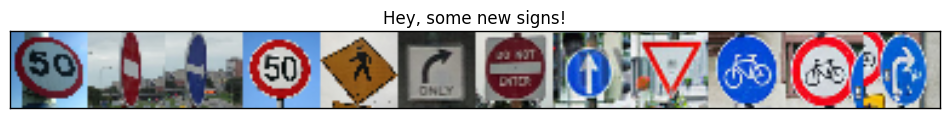

In [231]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Import new signs
import glob
new_signs = []
for img in glob.glob("test_images/*.jpg"):
    temp_img = cv2.imread(img)
    temp_img = cv2.resize(temp_img, (32, 32))
    temp_img = cv2.cvtColor(temp_img, cv2.COLOR_RGB2BGR)
    new_signs.append(temp_img)

    
new_signs_labels = [0 for i in range(len(new_signs))]
show_signs(new_signs, new_signs_labels, range(len(new_signs)), "Hey, some new signs!", False, False)

In [232]:
### Equalize
new_signs_eq = [equalize_image(image) for image in new_signs]

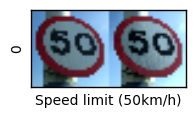

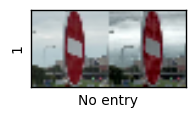

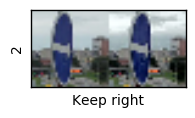

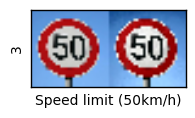

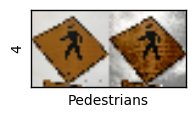

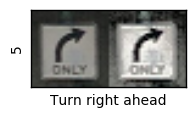

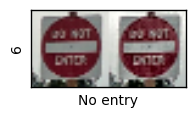

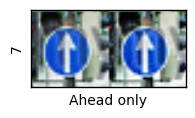

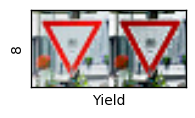

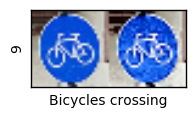

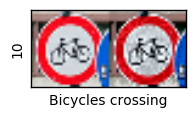

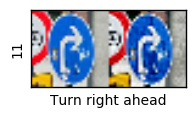

In [237]:
### Compare and assign label
new_signs_labels = [2, 17, 38, 2, 27, 33, 17, 35, 13, 29, 29, 33]
for i in range(len(new_signs)):
    show_signs(list(new_signs)+list(new_signs_eq), new_signs_labels, [i, i+len(new_signs)], "")

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

In [240]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

def top_k(input, rank):
    input = tf.nn.softmax(input)
    return tf.nn.top_k(input, rank)

### Take a look at the accuracy of the network on the original data
with tf.Session() as sess:
    saver.restore(sess, "tmp/model.ckpt")

    test_accuracy = evaluate(new_signs_eq, new_signs_labels)
    print("Accuracy on new images = {:.3f}".format(test_accuracy))
    top_5 = sess.run(top_k(logits, 5), feed_dict={x: new_signs_eq, y: new_signs_labels, keep_prob: 1.0})    

Accuracy on new images = 0.583


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

In [229]:
def examine_classification(images, labels, top_k_output, index = None):
    """ Plot image and top_k classifcation probabilites
    images -- classified images
    top_k_output -- output from tf.nn.top_k containing labels and probabilites
    index -- index of specific items to show.  default is to plot up to the first 20
    """
    if not index:
        if len(images) > 20:
            index = range(20)
        else:
            index = range(len(images))
    
    top_k_prob = top_k_output[0]
    top_k_label = top_k_output[1]
    
    for i in index:
        y_pos = np.arange(len(top_k_label[i]))
        probability = top_k_prob[i]
        label = [human_readable_label[k] for k in top_k_label[i]]

        fig = plt.figure(figsize=(6, 2))
        
        # Show image
        plt.subplot(1, 2, 1)
        plt.imshow(new_signs[i])
        plt.title(human_readable_label[labels[i]])
        plt.axis('off')
        
        # Show probability distribution
        plt.subplot(1, 2, 2)
        plt.barh(y_pos, probability, align='center', alpha=0.4)
        plt.yticks(y_pos, label)
        plt.xlim([0,1])
        # plt.xlabel('Probability')
        plt.title('Model Prediction')
        plt.tick_params(
            axis='both',
            which='both',
            bottom='off',
            top='off',
            left='off',
            right='on',
            labelleft='off',
            labelbottom='on',
            labelright='on')
        plt.show()

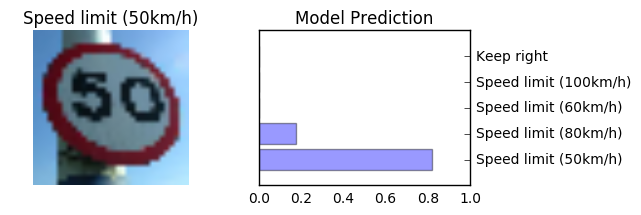

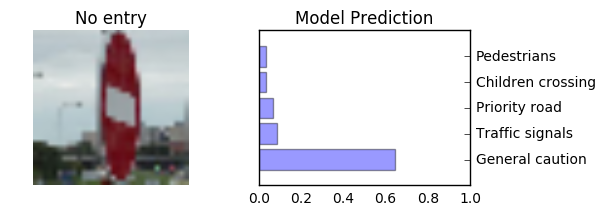

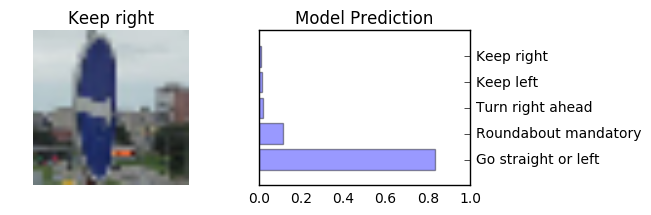

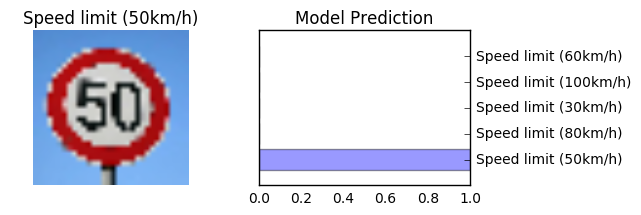

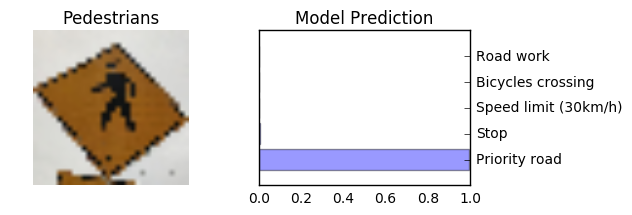

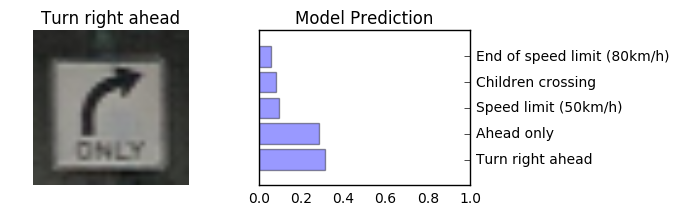

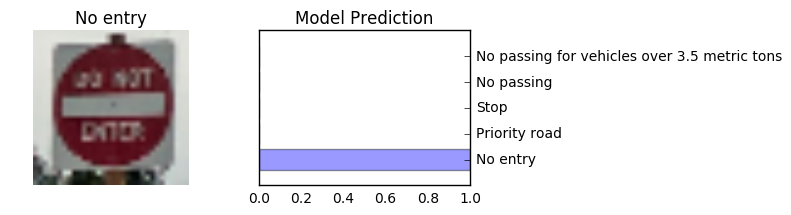

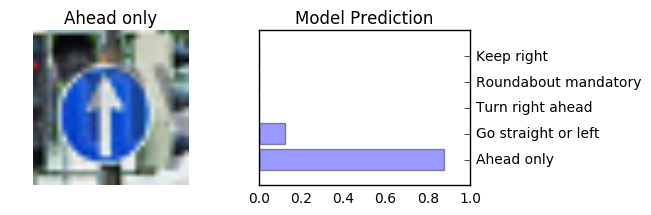

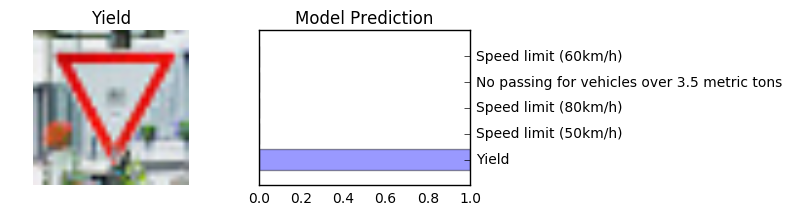

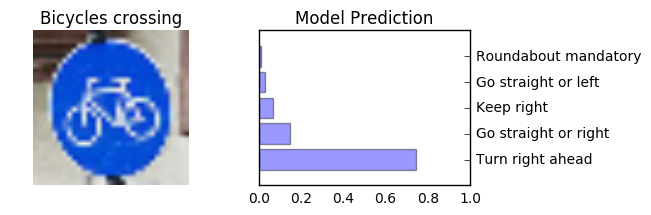

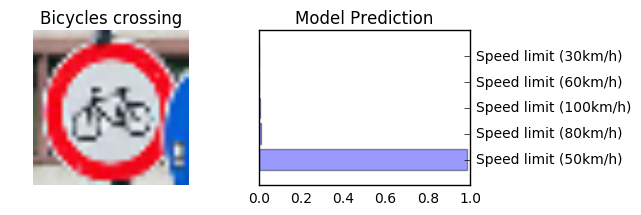

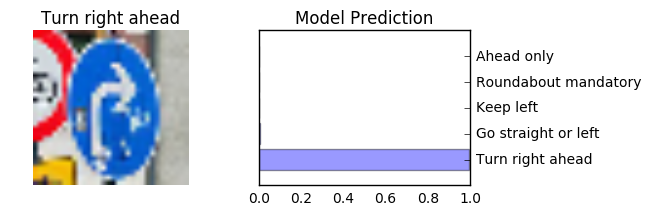

In [239]:
examine_classification(new_signs, new_signs_labels, top_5, index = None)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.